In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import emoji


##### 1. Understand dataset

In [2]:
df_suicide_detection = pd.read_csv('../data/raw/Suicide_Detection.csv', usecols=['text','class'])
df_suicide_detection.head()

text        class
0  Ex Wife Threatening SuicideRecently I left my ...      suicide
1  Am I weird I don't get affected by compliments...  non-suicide
2  Finally 2020 is almost over... So I can never ...  non-suicide
3          i need helpjust help me im crying so hard      suicide
4  I‚Äôm so lostHello, my name is Adam (16) and I‚Äôv...      suicide

All of texts are from one forum

In [3]:
df_suicide_detection['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

Dataset is balanced, there are two class.

In [4]:
df_suicide_detection['class'] = df_suicide_detection['class'].map({'suicide': 1, 'non-suicide':0})

##### 2. Preprocessing

Lowering of letters

In [5]:
df_suicide_detection['text'].iloc[1]

"Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it"

In [6]:
df_suicide_detection['corpus'] = df_suicide_detection['text'].apply(lambda x: x.lower())
df_suicide_detection['corpus'].iloc[1]

"am i weird i don't get affected by compliments if it's coming from someone i know irl but i feel really good when internet strangers do it"

Punctuation removal

In [7]:
df_suicide_detection['corpus'].iloc[1]

"am i weird i don't get affected by compliments if it's coming from someone i know irl but i feel really good when internet strangers do it"

In [8]:
df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
    .replace('\u200d', '')
    .replace("\n", '')
    .replace("\t", '')
    .replace("‚Äô", '')
    )
df_suicide_detection['corpus'].iloc[4]

'im so losthello my name is adam 16 and ive been struggling for years and im afraid through these past years thoughts of suicide fear anxiety im so close to my limit  ive been quiet for so long and im too scared to come out to my family about these feelings about 3 years ago  losing my aunt triggered it all everyday feeling hopeless  lost guilty and remorseful over her and all the things ive done in my lifebut thoughts like these with the little ive experienced in life only time ive revealed these feelings to my family is when i broke down where they saw my cuts watching them get so worried over something i portrayed as an average day made me feel absolutely dreadful they later found out i was an attempt survivor from attempt odoverdose from pills and attempt hanging all that happened was a blackout from the pills and i never went through with the noose because im still so afraid during my first therapy i was diagnosed with severe depression social anxiety and a eating disorderi was la

Removal links

In [11]:
df_suicide_detection['corpus'].iloc[232069]

'if you dont like rock then your not going to get anything on this but here i go httpsmusictastespacematchlavishwalrus913visionaryeggs973r1'

In [12]:
def remove_links(text):
    link_pattern = r'https?://\S+|www\.\S+|http\S+'
    without_links = re.sub(link_pattern, '', text)
    return without_links

df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(remove_links)
df_suicide_detection['corpus'].iloc[232069]

'if you dont like rock then your not going to get anything on this but here i go '

Numbers removal

In [14]:
df_suicide_detection['corpus'].iloc[2]

'finally 2020 is almost over so i can never hear 2020 has been a bad year ever again i swear to fucking god its so annoying'

In [15]:
def remove_numbers(text):
    without_numbers = re.sub(r'\d+', '', text)
    return without_numbers

df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(remove_numbers)
df_suicide_detection['corpus'].iloc[2]

'finally  is almost over so i can never hear  has been a bad year ever again i swear to fucking god its so annoying'

Transform emoji

In [16]:
df_suicide_detection['corpus'].iloc[232071]

'pee probably tastes like salty teaüòèüí¶‚ÄºÔ∏è can someone who drank pee before confirm thisüôÑ‚ÄºÔ∏è'

In [17]:
def replace_emoji(text):
    text_with_words = emoji.demojize(text).replace(':', ' ')
    return text_with_words

df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(replace_emoji)
df_suicide_detection['corpus'].iloc[232071]

'pee probably tastes like salty tea smirking_face  sweat_droplets  double_exclamation_mark  can someone who drank pee before confirm this face_with_rolling_eyes  double_exclamation_mark '

Tokenization

In [18]:
def tokenize(text):
    return word_tokenize(text)

df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(tokenize)
df_suicide_detection['corpus'].head(1)

0    [ex, wife, threatening, suiciderecently, i, le...
Name: corpus, dtype: object

Stopwords removal

In [19]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# stop_words.discard('no')
# stop_words.discard('not')
# stop_words.discard('don')
stop_words.add('dont')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(
    lambda document: [word for word in document if word not in stop_words]
    )
df_suicide_detection['corpus'].head(1)

0    [ex, wife, threatening, suiciderecently, left,...
Name: corpus, dtype: object

Shorten documents

In [21]:
def shorten_text(text):
    shortened_text = text[:200]
    return shortened_text

df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(shorten_text)

Stemming

In [22]:
stemmer = PorterStemmer()

In [23]:
df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(
    lambda document: [stemmer.stem(word) for word in document]
    )    
df_suicide_detection['corpus'].head(1)

0    [ex, wife, threaten, suiciderec, left, wife, g...
Name: corpus, dtype: object

In [24]:
df_suicide_detection['length'] = df_suicide_detection['text'].apply(lambda x: len(x.split()))
df_suicide_detection['post_length'] = df_suicide_detection['corpus'].apply(lambda x: len(x))

len_documents = pd.concat(
    [df_suicide_detection['length'].describe(),
    df_suicide_detection['post_length'].describe()],
    axis=1
)
len_documents.columns = ["before_preprocesing", "after_preprocessing"]
len_documents.drop('count')

before_preprocesing  after_preprocessing
mean           131.925235            54.082159
std            217.476787            56.246436
min              1.000000             0.000000
25%             26.000000            14.000000
50%             60.000000            30.000000
75%            155.000000            74.000000
max           9684.000000           200.000000

In [25]:
df_suicide_detection[df_suicide_detection['length']==9684]['text']

217197    Get out of my head.Get out of my head. Get out...
Name: text, dtype: object

In [26]:
len(df_suicide_detection[df_suicide_detection['post_length']==0])

40

In [27]:
df_suicide_detection[df_suicide_detection['post_length']==0]

text  class corpus  \
408     Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é  Ô∏é\nÔ∏é\...      0     []   
10312   ____ ____ _ ____ _______ ________ ______ _____...      0     []   
15952                             its 2am!!! how are you?      0     []   
20544   ... --- ... / .... . .-.. .--. / .--. .-.. . ....      1     []   
21188                                                :/:/      1     []   
24449   18+ only 19 20 21 22 23 24 25 26 27 28 29 30 3...      0     []   
26469                              I DID IT \n\n\n\n\nNot      0     []   
27232   8=D 8=========================================...      0     []   
35823   ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ...      0     []   
44673   8=============================================...      0     []   
55136                        this is me when the when the      0     []   
55552   9 1006 110 61 49 1006 110 61 4 | 33 92 26 | 22...      1     []   
65118           https://forms.gle/6Ciqusd44FRStgSA7 DO IT      0     []   
67347   https://open.spotify.com/track/1nM60x7ZOBAVVe3...      0     []   
75394          201992 1006 1 1 17  110 4 99  17 4 1006 26      1     []   
77776   Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é Ô∏é ...      0     []   
81678   ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ...      0     []   
94948   12576104 https://quizizz.com/ 12576104 [https:...      0     []   
102482                                  :(again and again      1     []   
106269                                           We‚Äôre no      0     []   
107288  This is why you are all here[https://www.youtu...      1     []   
119023                       What are those What are they      0     []   
122589  WHAT DO I DO?????[http://logs.Omegle.com/a030a...      1     []   
125343                            If only you were There.      0     []   
126125                                          Why not?       1     []   
131489  ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ‚Äç ...      0     []   
165812  You at the 901210? ___________________________...      0     []   
176348  ...9    \n8 1 22 5     \n14 5 22 5 18\n23 1 14...      1     []   
181389  https://youtu.be/A4BuL886bJA https://youtu.be/...      0     []   
184627  2 am https://yodhdndjdbdnfutu.be/i9dndnfnfbfnf...      0     []   
189067             are you??? https://imgur.com/a/O5f1tTe      0     []   
191413  I DID IT https://www.reddit.com/r/teenagers/co...      0     []   
192915  01110100 01101001 01110100 01101100 01100101  ...      0     []   
197270  01001000 01100101 01101100 01110000 01001001 1...      0     []   
205215                          can if when how where who      0     []   
210846                         ..........................      1     []   
216154                                  I am below you ;)      0     []   
218711  What do I do? [https://imgur.com/gallery/5d1Fx...      0     []   
223851  https://youtu.be/Nplac9le_do https://youtu.be/...      0     []   
229416  What should I do? https://www.reddit.com/r/pol...      0     []   

        length  post_length  
408         40            0  
10312        9            0  
15952        5            0  
20544      270            0  
21188        1            0  
24449      984            0  
26469        4            0  
27232        2            0  
35823      378            0  
44673        2            0  
55136        7            0  
55552      122            0  
65118        3            0  
67347        7            0  
75394       12            0  
77776       50            0  
81678      298            0  
94948        4            0  
102482       3            0  
106269       2            0  
107288       7            0  
119023       6            0  
122589       4            0  
125343       5            0

In [28]:
df_suicide_detection = df_suicide_detection[df_suicide_detection['post_length']!=0]

In [30]:
# df_suicide_detection.to_csv("prepared.csv")

##### 3. Vectorization

TF-IDF

In [41]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_suicide_detection['corpus'].apply(lambda x: ' '.join(x)))
Y = df_suicide_detection['class'].values

##### 4. Frequency analysis

In [31]:
from collections import Counter
import matplotlib.pyplot as plt

In [32]:
data_suicide = df_suicide_detection[df_suicide_detection['class'] == 1]
data_non_suicide = df_suicide_detection[df_suicide_detection['class'] == 0]

In [33]:
words_suicide = [word for post in data_suicide['corpus'] for word in post]
words_non_suicide = [word for post in data_non_suicide['corpus'] for word in post]

In [34]:
word_freq_suicide = Counter(words_suicide)
word_freq_non_suicide = Counter(words_non_suicide)

In [35]:
top_10_words_suicide = word_freq_suicide.most_common(10)
top_10_words_non_suicide = word_freq_non_suicide.most_common(10)

print("Top 10 words in 'suicide':\n", top_10_words_suicide)
print("Top 10 words in 'non-suicide':\n", top_10_words_non_suicide)

Top 10 words in 'suicide':
 [('im', 232492), ('want', 136668), ('feel', 127968), ('like', 114342), ('know', 97028), ('get', 95478), ('life', 93214), ('go', 92893), ('ive', 80581), ('cant', 78117)]
Top 10 words in 'non-suicide':
 [('im', 58231), ('like', 51234), ('filler', 33662), ('get', 30692), ('want', 26405), ('know', 24829), ('go', 22112), ('peopl', 21026), ('friend', 20261), ('feel', 20211)]


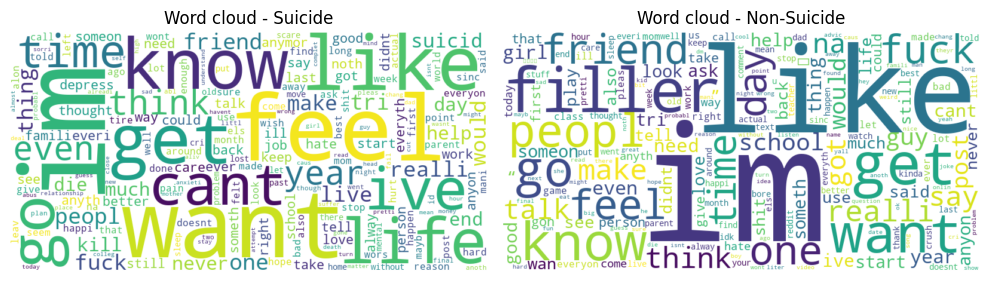

In [36]:
from wordcloud import WordCloud

wordcloud_suicide = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_suicide)
wordcloud_non_suicide = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_non_suicide)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_suicide, interpolation='bilinear')
plt.title('Word cloud - Suicide')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_suicide, interpolation='bilinear')
plt.title('Word cloud - Non-Suicide')
plt.axis('off')

plt.tight_layout()
plt.show()

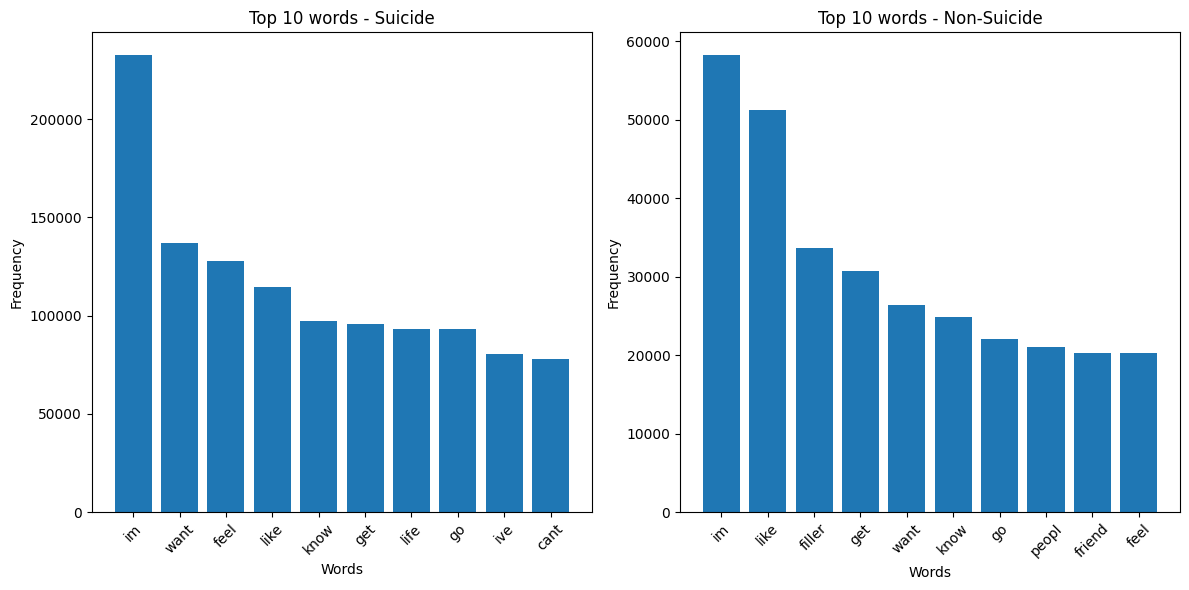

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(*zip(*top_10_words_suicide))
plt.title('Top 10 words - Suicide')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(*zip(*top_10_words_non_suicide))
plt.title('Top 10 words - Non-Suicide')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 5. Analysis of Length

In [38]:

len_documents = pd.concat(
    [data_suicide['length'].describe(),
    data_non_suicide['length'].describe(),
    data_suicide['post_length'].describe(),
    data_non_suicide['post_length'].describe()],
    axis=1
)
len_documents.columns = ["suicide","non_suicide","suicide_preprocesing", "non_suicide_preprocessing"]
len_documents.drop('count')

suicide  non_suicide  suicide_preprocesing  \
mean   202.675782    61.184489             79.871952   
std    255.314824   139.276488             61.918560   
min      1.000000     2.000000              1.000000   
25%     60.000000    19.000000             29.000000   
50%    127.000000    31.000000             61.000000   
75%    251.000000    60.000000            118.000000   
max   9684.000000  8220.000000            200.000000   

      non_suicide_preprocessing  
mean                  28.306568  
std                   34.114342  
min                    1.000000  
25%                   10.000000  
50%                   17.000000  
75%                   31.000000  
max                  200.000000

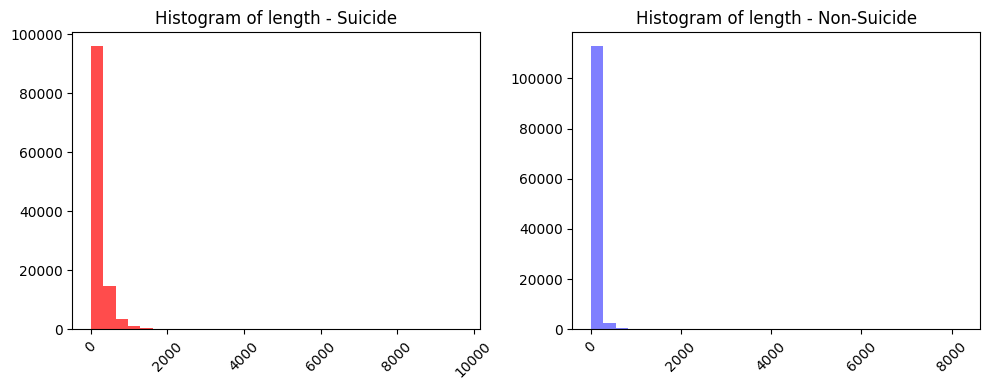

In [39]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data_suicide['length'],bins=30, alpha=0.7, color='red', label='Suicide')
plt.title('Histogram of length - Suicide')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(data_non_suicide['length'], bins=30, alpha=0.5, color='blue', label='Non-Suicide')
plt.title('Histogram of length - Non-Suicide')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 6. Thematic Analysis

In [42]:
X_suicide = X[Y == 1]
X_non_suicide = X[Y == 0]

In [43]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', random_state=42)
lda_output = lda_model.fit_transform(X_suicide)

In [44]:
for idx, topic in enumerate(lda_model.components_):
    print(f"Suicide topic {idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Suicide topic 1:
['suicid', 'time', 'think', 'ive', 'know', 'like', 'life', 'feel', 'want', 'im']
Suicide topic 2:
['plz', 'abouti', 'copi', 'phd', 'grind', 'daysi', 'mewhi', 'overthink', 'haha', 'ta']
Suicide topic 3:
['ibuprofen', 'tomorrowi', 'tonightim', 'donat', 'tylenol', 'bleak', 'liver', 'deathi', 'suicidali', 'blah']
Suicide topic 4:
['worthlessi', 'monthsi', 'okayi', 'latest', 'euthanasia', 'inher', 'quickest', 'myselfit', 'meit', 'mg']
Suicide topic 5:
['oxygen', 'monoxid', 'troll', 'grand', 'carbon', 'ring', 'traffic', 'ambul', 'fuckin', 'km']


In [45]:
lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', random_state=42)
lda_output = lda_model.fit_transform(X_non_suicide)

In [46]:
for idx, topic in enumerate(lda_model.components_):
    print(f"Non suicide topic {idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Non suicide topic 1:
['talk', 'bore', 'guy', 'girl', 'post', 'wan', 'like', 'im', 'na', 'filler']
Non suicide topic 2:
['plz', 'aint', 'project', 'vote', 'star', 'war', 'trump', 'smiling_face_with_sunglass', 'ban', 'anim']
Non suicide topic 3:
['celebr', 'pleading_fac', 'epic', 'offici', 'valentin', 'compliment', 'profil', 'updat', 'loudly_crying_fac', 'birthday']
Non suicide topic 4:
['feel', 'time', 'got', 'peopl', 'day', 'know', 'fuck', 'school', 'like', 'im']
Non suicide topic 5:
['click', 'nut', 'haha', 'curiou', 'pic', 'simp', 'luck', 'ampxb', 'pensive_fac', 'flushed_fac']


Analiza temat√≥w dotyczƒÖcych samob√≥jstw:
Temat 1: Skupia siƒô na emocjach i my≈õlach zwiƒÖzanych z samob√≥jstwem, jak czas, my≈õli, ≈ºycie, uczucia i chƒôƒá.

Temat 2: Wydaje siƒô bardziej zr√≥≈ºnicowany, zawierajƒÖc s≈Çowa, kt√≥re mogƒÖ byƒá powiƒÖzane z emocjami, pracƒÖ naukowƒÖ lub problemami codziennymi.

Temat 3: Skupia siƒô na mniej konwencjonalnych metodach lub pojƒôciach zwiƒÖzanych z samob√≥jstwem, takich jak nazwy lek√≥w czy emocje zwiƒÖzane z tymi dzia≈Çaniami.

Temat 4: Zawiera s≈Çowa sugerujƒÖce poczucie beznadziejno≈õci, mo≈ºliwƒÖ izolacjƒô i my≈õli samob√≥jcze.

Temat 5: Wydaje siƒô zawieraƒá bardziej techniczne lub zewnƒôtrzne terminy, kt√≥re mogƒÖ byƒá powiƒÖzane z metodami samookaleczenia lub samob√≥jstwem.

Analiza temat√≥w non-suicide:
Temat 1: Wydaje siƒô byƒá og√≥lny, zawierajƒÖc s≈Çowa, kt√≥re mogƒÖ byƒá stosowane w wielu kontekstach, takich jak rozmowy, nudziarstwo, postowanie, itp.

Temat 2: Zawiera s≈Çowa, kt√≥re mogƒÖ byƒá zwiƒÖzane z tre≈õciami niemajƒÖcych zwiƒÖzku ze samob√≥jstwem, np. politykƒÖ, filmami, czy popularnymi tematami.

Temat 3: Zawiera s≈Çowa bardziej zwiƒÖzane z celebracjƒÖ, takie jak ≈ºyczenia, urodziny, czy zmiany w profilu, co wydaje siƒô odbiegaƒá od tre≈õci samob√≥jczych.

Temat 4: Zawiera s≈Çowa, kt√≥re mogƒÖ byƒá powszechne w rozmowach codziennych, bez bezpo≈õredniego odniesienia do samob√≥jstwa.

Temat 5: Wydaje siƒô zawieraƒá s≈Çowa lub frazy, kt√≥re mogƒÖ byƒá bardziej zwiƒÖzane z tre≈õciami humorystycznymi lub niezwiƒÖzane bezpo≈õrednio z samob√≥jstwem.

Analiza ta mo≈ºe sugerowaƒá r√≥≈ºnice w tematach poruszanych w tre≈õciach dotyczƒÖcych samob√≥jstwa i tych, kt√≥re nie dotyczƒÖ tej tematyki. Tematy zwiƒÖzane z samob√≥jstwem zawierajƒÖ s≈Çowa zwiƒÖzane z emocjami, metodami samookaleczenia i beznadziejno≈õciƒÖ, podczas gdy tematy non-suicide sƒÖ bardziej zr√≥≈ºnicowane i skupiajƒÖ siƒô na r√≥≈ºnych, czƒôsto codziennych, tematach.

##### 7. Sentiment Analysis

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    text = ' '.join(text)
    sentiment = sid.polarity_scores(text)
    return sentiment

# df_suicide_detection['sentiment'] = df_suicide_detection['corpus'].apply(lambda text: ' '.join(text))
df_suicide_detection['sentiment'] = df_suicide_detection['corpus'].apply(sentiment_analysis)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
grouped = df_suicide_detection.groupby(df_suicide_detection['class'])['sentiment'].apply(list).reset_index()

df_sentiment = pd.concat([
    pd.DataFrame(grouped['sentiment'].iloc[0]).mean(),
    pd.DataFrame(grouped['sentiment'].iloc[1]).mean()],
axis=1,
)
df_sentiment.columns=['non_suicide','suicide']
df_sentiment

non_suicide   suicide
neg          0.137643  0.209482
neu          0.685794  0.624937
pos          0.176453  0.165581
compound     0.082155 -0.248371

W kategorii 'suicide' ≈õrednio wystƒôpuje wy≈ºszy negatywny sentyment (0.209) ni≈º w 'non_suicide' (0.137). Mo≈ºe to sugerowaƒá, ≈ºe wpisy zwiƒÖzane ze s≈Çowami samob√≥jstwa mogƒÖ zawieraƒá wiƒôcej tre≈õci o negatywnym nastroju.  
Wska≈∫niki nutralny i pozytywny zbli≈ºone.  
Compound jest warto≈õciƒÖ og√≥lnƒÖ sentymentu. W 'suicide' jest on ni≈ºszy (-0.248) ni≈º w 'non_suicide' (0.082). Mo≈ºe to wskazywaƒá, ≈ºe og√≥lny nastrojowy kontekst w kategoriach 'suicide' jest bardziej sk≈Çonny ku negatywno≈õci w por√≥wnaniu do 'non_suicide'.

Extreme opinions

In [51]:
extremely_negative = df_suicide_detection[df_suicide_detection['sentiment'].apply(lambda x: x['compound'] < -0.999)]

print("Extremely negative:")
print(extremely_negative[['corpus', 'class']])

Extremely negative:
                                                   corpus  class
349     [want, end, myselfsad, pain, sad, pain, sad, p...      1
3458    [meow, cat, unmut, zoom, fuck, fuck, fuck, fuc...      0
4852    [fuck, mess, much, time, nsfw, due, languageco...      1
5131    [fuck, ghod, go, shtit, abnd, cum, nmi, teache...      0
8056    [easier, kill, go, traumai, wan, na, fuck, km,...      1
10315   [im, turn, soon, im, fuckkmg, terrifi, might, ...      1
11818   [predict, feel, rn, shit, fuck, shit, fuck, sh...      0
25022   [unwant, unwant, unwant, unlov, unlov, cure, c...      1
30236   [hurtshurt, hurt, hurt, hurt, hurt, hurt, hurt...      1
39257   [exist, fuck, nightmareeveri, fuck, time, some...      1
39323   [fuck, brice, maddock, fuck, brice, maddock, f...      0
42349   [fuck, fuck, fuck, fuck, fuckfuck, fuck, fuck,...      1
43729   [need, let, anger, fuck, fuck, fuck, shit, fuc...      0
45405   [kill, pleasejust, kill, kill, kill, kill, kil...      1
48127

In [52]:
extremely_positive = df_suicide_detection[df_suicide_detection['sentiment'].apply(lambda x: x['compound'] > 0.999)]

print("Extremely positive:")
print(extremely_positive[['corpus', 'class']])

Extremely positive:
                                                   corpus  class
4183    [talk, mei, need, lp, need, help, need, help, ...      1
8577    [may, may, get, notic, post, anyway, care, you...      0
15963   [read, love, love, love, love, love, love, lov...      0
47143   [your, ever, sad, rememb, your, world, glam, p...      0
51241   [remind, kid, eat, rich, eat, rich, eat, rich,...      0
100556  [know, yall, struggl, wow, wow, wow, wow, wow,...      0
102371  [unpopular, opinion, peopl, alway, think, life...      0
128899  [good, day, pleas, thank, good, day, good, day...      0
155452  [school, motto, kinda, cring, care, share, dar...      0
170740  [copypasta, im, six, pardon, grammar, nasti, c...      0
172229  [need, helpi, need, help, need, help, need, he...      1
173339  [pleas, help, mei, need, help, need, help, nee...      1
177096  [mf, like, mf, like, mf, like, mf, like, mf, l...      0
178580  [love, love, love, love, love, love, love, lov...      0
20650

Adjusted

In [53]:
def adjust_sentiment(text, sentiment):
    if "help" in text:
        return -0.5  
    return sentiment 

def sentiment_analysis(text):
    text = " ".join(text)
    sentiment = sid.polarity_scores(text)
    if "help" in text:
        sentiment['compound'] -= 0.5 
    return sentiment

df_suicide_detection['adjusted_sentiment'] = df_suicide_detection.apply(lambda row: adjust_sentiment(row['corpus'], row['sentiment']['compound']), axis=1)

In [54]:
grouped = df_suicide_detection.groupby(df_suicide_detection['class'])['adjusted_sentiment'].apply(list).reset_index()

df_sentiment = pd.concat([
    pd.DataFrame(grouped['adjusted_sentiment'].iloc[0]).mean(),
    pd.DataFrame(grouped['adjusted_sentiment'].iloc[1]).mean()],
axis=1,
)
df_sentiment.columns=['non_suicide','suicide']
df_sentiment

non_suicide   suicide
0     0.020971 -0.343747

In [66]:
extremely_positive = df_suicide_detection[df_suicide_detection['adjusted_sentiment'].apply(lambda x: x > 0.999)]

print("Extremely positive:")
print(extremely_positive[['corpus', 'class']])

Extremely positive:
                                                   corpus  class
8577    [may, may, get, notic, post, anyway, care, you...      0
15963   [read, love, love, love, love, love, love, lov...      0
47143   [your, ever, sad, rememb, your, world, glam, p...      0
51241   [remind, kid, eat, rich, eat, rich, eat, rich,...      0
100556  [know, yall, struggl, wow, wow, wow, wow, wow,...      0
102371  [unpopular, opinion, peopl, alway, think, life...      0
128899  [good, day, pleas, thank, good, day, good, day...      0
155452  [school, motto, kinda, cring, care, share, dar...      0
170740  [copypasta, im, six, pardon, grammar, nasti, c...      0
177096  [mf, like, mf, like, mf, like, mf, like, mf, l...      0
178580  [love, love, love, love, love, love, love, lov...      0
206508  [georg, floyd, moment, xd, xd, xd, xd, xd, xd,...      0


Length correlation

In [61]:
correlation = df_suicide_detection['post_length'].corr(df_suicide_detection['adjusted_sentiment'])
print(f"Correlation between text length and sentiment: {correlation}")

Correlation between text length and sentiment: -0.18553369080021795


The correlation of -0.1855 suggests a weak but negative relationship between text length and sentiment.

##### 8. Association Analysis

In [284]:
import random

random.seed(42)

tokenized_texts = df_suicide_detection['corpus'].to_list()
sample_size = int(len(tokenized_texts) * 0.1) 
sampled_data = random.sample(tokenized_texts, sample_size)

te = TransactionEncoder()
te_ary = te.fit_transform(sampled_data)
df = pd.DataFrame(te_ary, columns=te.columns_)

Data sample

In [289]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [292]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.2) 
                   ]

support      itemsets  length
96   0.217730    (im, feel)       2
100  0.208077  (like, feel)       2
119  0.216696     (im, get)       2
134  0.215403      (im, go)       2
152  0.213765    (know, im)       2
154  0.245141    (im, like)       2
169  0.243244    (im, want)       2

In [293]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [294]:
rules

antecedents         consequents  antecedent support  consequent support  \
0          (even)              (cant)            0.215963            0.233935   
1          (cant)              (even)            0.233935            0.215963   
2          (cant)              (feel)            0.233935            0.298841   
3          (feel)              (cant)            0.298841            0.233935   
4           (get)              (cant)            0.316856            0.233935   
..            ...                 ...                 ...                 ...   
697  (like, feel)          (im, want)            0.208077            0.243244   
698        (want)    (im, like, feel)            0.357281            0.161703   
699          (im)  (feel, like, want)            0.490497            0.130974   
700        (like)    (feel, im, want)            0.372452            0.139982   
701        (feel)    (im, like, want)            0.298841            0.147395   

      support  confidence      lift  leverage  conviction  zhangs_metric  
0    0.103219    0.477949  2.043080  0.052698    1.467412       0.651172  
1    0.103219    0.441231  2.043080  0.052698    1.403149       0.666449  
2    0.123691    0.528740  1.769304  0.053782    1.487839       0.567584  
3    0.123691    0.413903  1.769304  0.053782    1.307060       0.620124  
4    0.125889    0.397307  1.698362  0.051765    1.271069       0.601919  
..        ...         ...       ...       ...         ...            ...  
697  0.107874    0.518434  2.131330  0.057261    1.571448       0.670279  
698  0.107874    0.301930  1.867186  0.050100    1.200878       0.722610  
699  0.107874    0.219928  1.679167  0.043631    1.114032       0.793845  
700  0.107874    0.289632  2.069068  0.055737    1.210666       0.823348  
701  0.107874    0.360975  2.449035  0.063826    1.334228       0.843854  

[702 rows x 10 columns]

In [295]:
high_confidence_rules = rules[rules['confidence'] > 0.9]
high_confidence_rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []